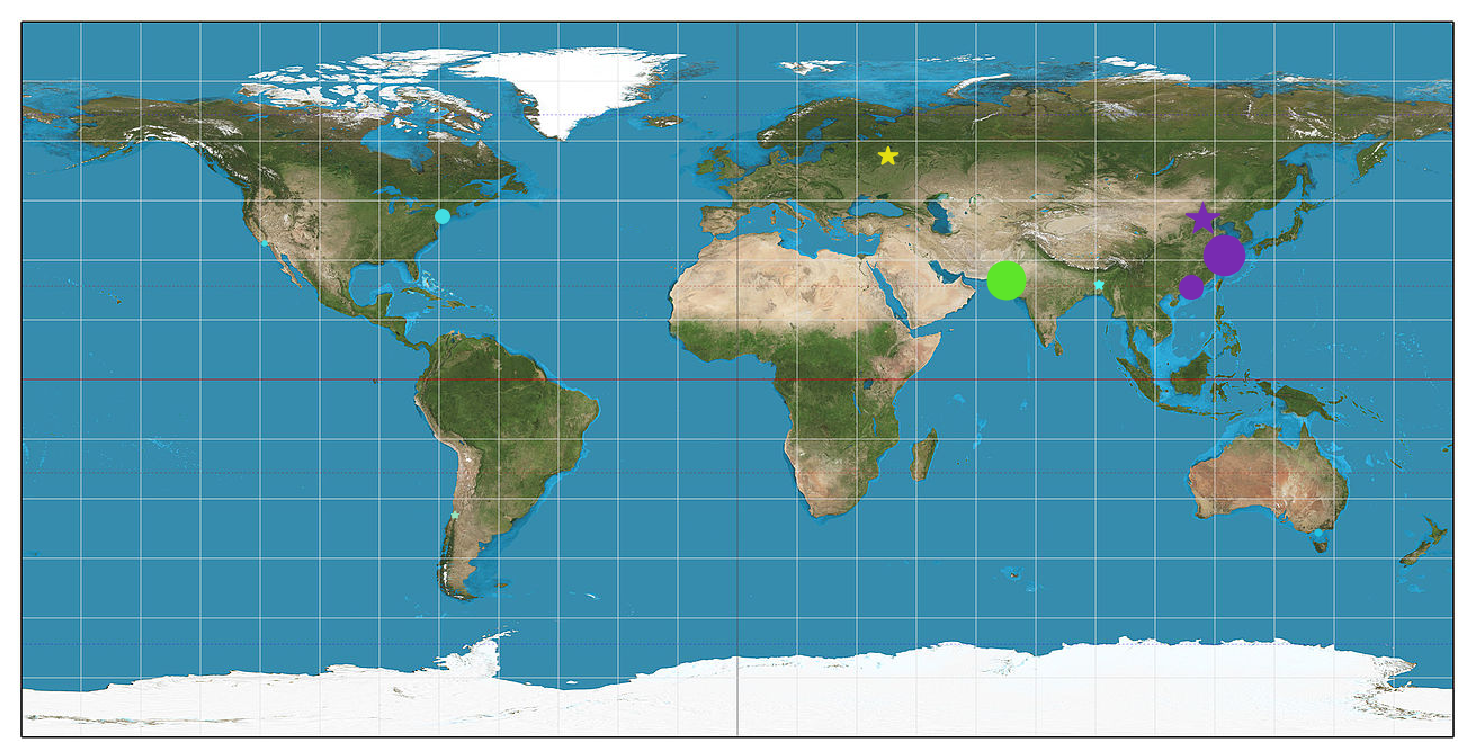

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# 1280 x 644
scale_longitude = 1280/360
scale_latitude = 644/180
center_x, center_y = 640, 322
df = pd.read_csv('cities.csv')

fig, axes = plt.subplots(figsize=(16,8), dpi=120)
with open('world.jpg', 'rb') as f:
    img = plt.imread(f)
axes.axis('off')
axes.imshow(img)
for i in axes.spines:
    axes.spines[i].set_position('center')
country_clrs = {country: np.random.rand(3,) for country in set(df['Country'])}
for i in range(12):
    city = df.iloc[i]
    if city['Population'] < 1e6:
        continue
    x = scale_longitude*(city['Latitude deg'] + city['Latitude min']/60 + city['Latitude sec']/3600)
    phi = (city['Longitude deg'] + city['Longitude min']/60 + city['Longitude sec']/3600)*np.pi/180
    y = scale_latitude*(city['Longitude deg'] + city['Longitude min']/60 + city['Longitude sec']/3600) \
#           * np.log(np.tan(np.pi/4 + phi/2))

    axes.plot([center_x + x], [center_y - y], 
              '*' if city['Capital'] else 'o', 
              c=country_clrs[city['Country']], 
              ms=city['Population']//1e6)